Math 5750/6880: Mathematics of Data Science \\
Project 1

# 3. Python and Google Colab
Project Euler Problem  
https://projecteuler.net/

In [1]:
'''
Problem 1
If we list all the natural numbers below 10 that are multiples of 3 or 5, we get
3,5,6, and 9. The sum of these multiples is 23.

Find the sum of all the multiples of 3 or 5 below 1000.
'''

x = sum(set(range(0,1000,3))|set(range(0,1000,5)))
print(x)

233168


# 4. Regression Analysis
California housing data  
https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [3]:
# Load the California housing data
cal = fetch_california_housing(as_frame=True)
X, y = cal.data, cal.target
feature_names = X.columns
print(feature_names)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')


implement Linear Regression
- model fitting


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

Train/test evaluation with R2, MAE, and RMSE

In [5]:
def regression_metrics(y_true, y_pred, dataset_name="Test"):
  r2=r2_score(y_true, y_pred)
  mae=mean_absolute_error(y_true, y_pred)
  rmse=root_mean_squared_error(y_true, y_pred)
  print(f"{dataset_name} R2: {r2:.4f}")
  print(f"{dataset_name} MAE: {mae:.4f}")
  print(f"{dataset_name} RMSE: {rmse:.4f}")
  return r2, mae, rmse

print("linear regression:")
train_metrics = regression_metrics(y_train, y_pred_train,"Train")
test_metrics = regression_metrics(y_test, y_pred_test, "Test")

linear regression:
Train R2: 0.6089
Train MAE: 0.5309
Train RMSE: 0.7235
Test R2: 0.5943
Test MAE: 0.5351
Test RMSE: 0.7273


Scatter plot of predicted vs. true median house values

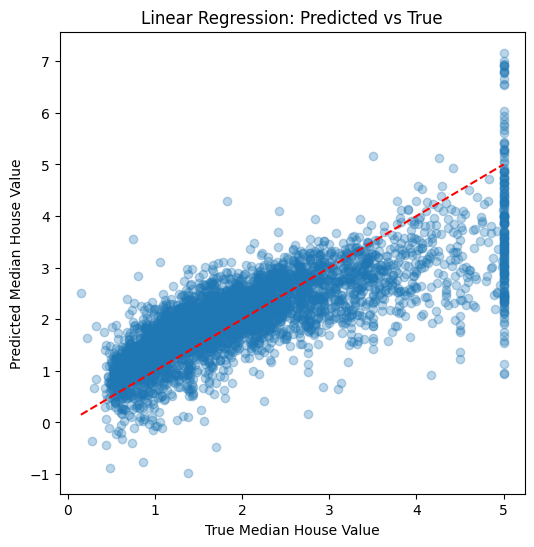

In [6]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_test, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("True Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Linear Regression: Predicted vs True")
plt.show()

Histogram of model prediction errors

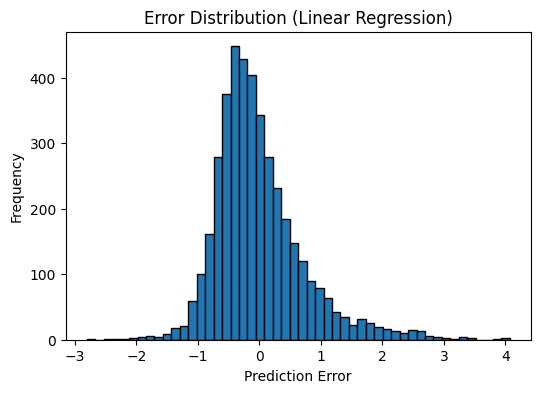

In [7]:
errors = y_test - y_pred_test
plt.figure(figsize=(6,4))
plt.hist(errors, bins=50, edgecolor='black')
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.title("Error Distribution (Linear Regression)")
plt.show()

Extraction of feature coefficients to assess which feature is important. reference: https://inria.github.io/scikit-learn-mooc/python_scripts/dev_features_importance.html

      Feature  Coefficient
3   AveBedrms     0.593215
7   Longitude    -0.434166
0      MedInc     0.433333
6    Latitude    -0.421449
2    AveRooms    -0.098643
1    HouseAge     0.009293
5    AveOccup    -0.004745
4  Population    -0.000008


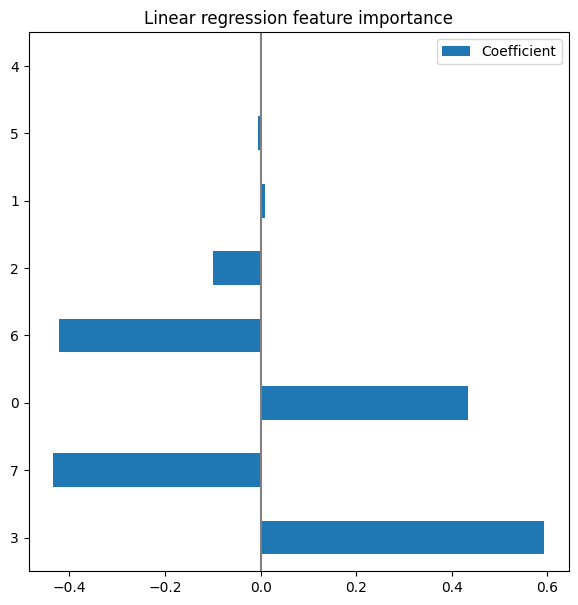

In [8]:
coef_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": lr.coef_
}).sort_values(by="Coefficient", key=abs, ascending=False)

print(coef_df)

coef_df.plot(kind="barh", figsize=(9, 7))
plt.title("Linear regression feature importance")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

In [9]:
# other regression models - ridge, lasso
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge(alpha=1.0).fit(X_train, y_train)
lasso = Lasso(alpha=0.01).fit(X_train, y_train)

print("Ridge Regression Performance:")
regression_metrics(y_test, ridge.predict(X_test))

print("Lasso Regression Performance:")
regression_metrics(y_test, lasso.predict(X_test))

Ridge Regression Performance:
Test R2: 0.5943
Test MAE: 0.5351
Test RMSE: 0.7273
Lasso Regression Performance:
Test R2: 0.5859
Test MAE: 0.5413
Test RMSE: 0.7348


(0.58591840670895, 0.5412630094084512, 0.7348086305495998)

# 5. Classification Analysis
Diagnostic Wisconsin Breast Cancer Database  
https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [11]:
# Load Breast Cancer Wisconsin Dataset
data = load_breast_cancer(as_frame=True)
X = data.data
y = data.target                  # 0 = malignant, 1 = benign
feature_names = X.columns
label_names = {0: "malignant", 1: "benign"}
print(feature_names)

# Train/Test Split (stratified to preserve class balance)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0, stratify=y)

# Preprocess Data (fit on train ONLY; then transform both)
scaler = StandardScaler(with_mean=True, with_std=True)
X_train_std = scaler.fit_transform(X_train)   # fit on train
X_test_std  = scaler.transform(X_test)        # transform test with train stats

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')


Train SVM classifier, using linear kernel to allow us to obtain feature importance. For other kernels it is not possible because data are transformed by kernel method to another space, which is not related to input space

In [14]:
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, roc_auc_score, average_precision_score,
    confusion_matrix, RocCurveDisplay, PrecisionRecallDisplay
)

# Train linear SVM
svm = SVC(kernel="linear", probability=True, random_state=0)
svm.fit(X_train_std, y_train)

# Predictions
y_pred = svm.predict(X_test_std)
y_prob = svm.predict_proba(X_test_std)[:, 1]

Classification metrics

Accuracy: 0.982
ROC AUC: 0.996
Average Precision: 0.998
Confusion Matrix:
 [[40  2]
 [ 0 72]]


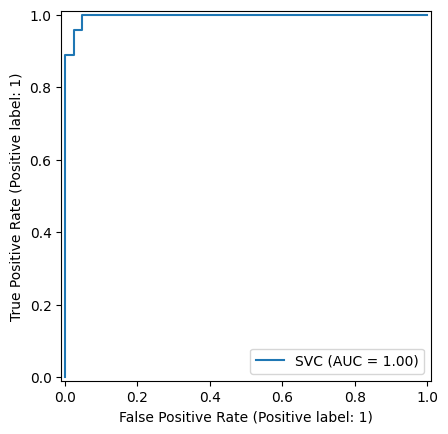

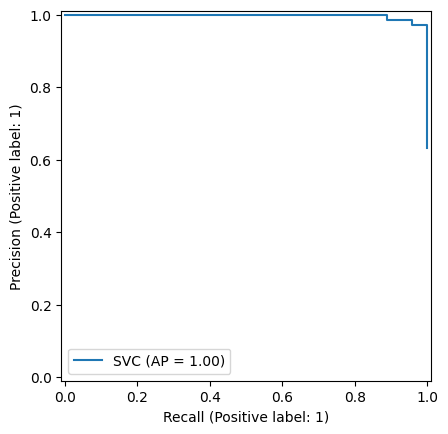

In [15]:
acc = accuracy_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_prob)
ap  = average_precision_score(y_test, y_prob)
print(f"Accuracy: {acc:.3f}")
print(f"ROC AUC: {roc:.3f}")
print(f"Average Precision: {ap:.3f}")

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

RocCurveDisplay.from_estimator(svm, X_test_std, y_test)
plt.show()
PrecisionRecallDisplay.from_estimator(svm, X_test_std, y_test)
plt.show()

reference: https://stackoverflow.com/questions/41592661/determining-the-most-contributing-features-for-svm-classifier-in-sklearn

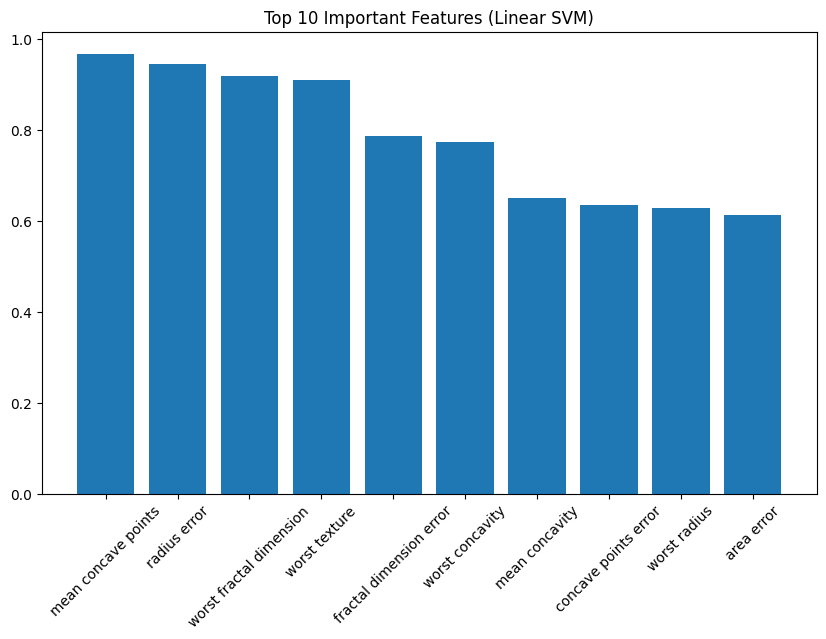

In [16]:
# Feature importance from coef_
coefs = np.abs(svm_linear.coef_[0])
indices = np.argsort(coefs)[::-1]

plt.figure(figsize=(10,6))
plt.bar(range(10), coefs[indices[:10]], align="center")
plt.xticks(range(10), feature_names[indices[:10]], rotation=45)
plt.title("Top 10 Important Features (Linear SVM)")
plt.show()

In [17]:
from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    # "Random Forest": RandomForestClassifier(random_state=0),
    "KNN": KNeighborsClassifier()
}

for name, model in models.items():
    model.fit(X_train_std, y_train)
    y_pred = model.predict(X_test_std)
    y_prob = model.predict_proba(X_test_std)[:, 1]
    print(f"\n{name}")
    print(" Accuracy:", accuracy_score(y_test, y_pred))
    print(" ROC AUC:", roc_auc_score(y_test, y_prob))
    print(" Avg Precision:", average_precision_score(y_test, y_prob))



Logistic Regression
 Accuracy: 0.9824561403508771
 ROC AUC: 0.9957010582010581
 Avg Precision: 0.9974301219609739

KNN
 Accuracy: 0.956140350877193
 ROC AUC: 0.970568783068783
 Avg Precision: 0.9671208343083343
